In [10]:
import sqlite3
import pandas as pd

# DISS, STWMRKT, IPSWICH, MANNGTR, STFD, LIVST,    SHENFLD, NRCH
conn = sqlite3.connect("..\data\dataset.sqlite")
df = pd.read_sql_query("""SELECT * FROM dataset WHERE tpl_from="IPSWICH" 
                          AND tpl_to="MANNGTR"  """, conn)
conn.close()
df.head

<bound method NDFrame.head of       tpl_from   tpl_to  day_of_week  weekday  off_peak  hour_of_day  delay  \
0      IPSWICH  MANNGTR            7        0         1            7     -1   
1      IPSWICH  MANNGTR            7        0         1            7      0   
2      IPSWICH  MANNGTR            7        0         1            7      2   
3      IPSWICH  MANNGTR            7        0         1            7      0   
4      IPSWICH  MANNGTR            7        0         1            8     -1   
...        ...      ...          ...      ...       ...          ...    ...   
30608  IPSWICH  MANNGTR            2        1         1           20      6   
30609  IPSWICH  MANNGTR            2        1         1           20      4   
30610  IPSWICH  MANNGTR            2        1         1           21      3   
30611  IPSWICH  MANNGTR            2        1         1           21      0   
30612  IPSWICH  MANNGTR            2        1         1           22      3   

       delay_change  

In [11]:
x = df.iloc[:, 2:-1].values
y = df.iloc[:, 7].values
br_score = []
r2 = []
mse = []

for i in range(100):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)


    from sklearn.linear_model import BayesianRidge
    reg = BayesianRidge()
    reg.fit(x_train, y_train)
    br_score.append(reg.score(x_train, y_train))


    from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
    from math import sqrt
    y_pred = reg.predict(x_test)
    r2.append(r2_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))

In [12]:
print("Model score: {:.4f}".format(sum(br_score)/len(br_score))) # r2 metric
print("r2   = {:.4f}".format(sum(r2)/len(r2)))
avg_mse = sum(mse) / len(mse)
print("MSE  = {:.4f}".format(avg_mse))
print("RMSE = {:.4f}".format(sqrt(avg_mse)))

Model score: 0.1077
r2   = 0.1068
MSE  = 5.5978
RMSE = 2.3660


In [138]:
# Algorithm to turn the predicted value into a catagorical estimate for the change in delay 

# find the min and max values that the predictions fall between
min_pred = y_pred.min()
max_pred = y_pred.max()
print("min:", min_pred, " max:", max_pred)
y_sorted = y_pred.copy()

# find the the min and max spread for the central 90% of delay changes
five_pc = int(5 * len(y_sorted) / 100)  # find five percent of the set to remove from each end
y_sorted.sort()
y_sliced = y_sorted[five_pc:-five_pc]
print(len(y_sliced), "from", len(y_sorted))
# new min and max once sliced
min_slice = y_sliced.min()
max_slice = y_sliced.max()
print("min:", min_slice, " max:", max_slice)

# find the spread for the central 90% of actual changes
y_t_sorted = y_test.copy()
five_pc = int(5 * len(y_t_sorted) / 100)  # find five percent of the set to remove from each end
y_t_sorted.sort()

y_t_sliced = y_t_sorted[five_pc:-five_pc]
print(len(y_t_sliced), "from", len(y_t_sorted))
# new min and max once sliced
min_t_slice = y_t_sliced.min()
max_t_slice = y_t_sliced.max()
print("min:", min_t_slice, " max:", max_t_slice)

min_delay = y_test

min: 0.3407627174268715  max: 3.4034165800042566
3421 from 3801
min: 1.0466272520129825  max: 2.488621332358549
3421 from 3801
min: 0  max: 3


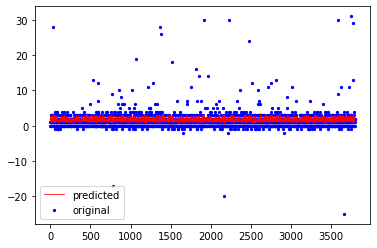

In [137]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
# plt.scatter(x_ax, y_test[2050:2500], s=5, color="blue", label="actuals")
# plt.plot(x_ax, y_pred[2050:2500], lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

In [54]:
# using the model
for i in range(-10, 10):
    pred = reg.predict([[5, 1, 1, 14, i]]) # "day_of_week", "weekday", "off_peak", "hour_of_day", "delay"
    print(i, pred)

-10 [-1.07941848]
-9 [-0.88827199]
-8 [-0.69712551]
-7 [-0.50597902]
-6 [-0.31483254]
-5 [-0.12368605]
-4 [0.06746044]
-3 [0.25860692]
-2 [0.44975341]
-1 [0.64089989]
0 [0.83204638]
1 [1.02319286]
2 [1.21433935]
3 [1.40548584]
4 [1.59663232]
5 [1.78777881]
6 [1.97892529]
7 [2.17007178]
8 [2.36121826]
9 [2.55236475]
